In [1]:
import yfinance
import pandas as pd
import numpy as np

In [79]:
amzn_data = yfinance.Ticker("AMZN")
amzn_data

yfinance.Ticker object <AMZN>

In [80]:
amzn_df = amzn_data.history(period="max", interval="1d")
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,222.509995,225.360001,221.619995,224.190002,27515600,0.0,0.0
2025-01-06 00:00:00-05:00,226.779999,228.839996,224.839996,227.610001,31849800,0.0,0.0
2025-01-07 00:00:00-05:00,227.899994,228.380005,221.460007,222.110001,28084200,0.0,0.0


In [81]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6959 entries, 1997-05-15 00:00:00-04:00 to 2025-01-10 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6959 non-null   float64
 1   High          6959 non-null   float64
 2   Low           6959 non-null   float64
 3   Close         6959 non-null   float64
 4   Volume        6959 non-null   int64  
 5   Dividends     6959 non-null   float64
 6   Stock Splits  6959 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 434.9 KB


In [82]:
amzn_df.shape

(6959, 7)

In [83]:
amzn_df = amzn_df.loc[:, ['Close', 'Volume']]
amzn_df

,Close,Volume
Date,,
1997-05-15 00:00:00-04:00,0.097917,1443120000
1997-05-16 00:00:00-04:00,0.086458,294000000
1997-05-19 00:00:00-04:00,0.085417,122136000
1997-05-20 00:00:00-04:00,0.081771,109344000
1997-05-21 00:00:00-04:00,0.071354,377064000
...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600
2025-01-06 00:00:00-05:00,227.610001,31849800
2025-01-07 00:00:00-05:00,222.110001,28084200


In [84]:
# to check for null values
amzn_df.describe()

,Close,Volume
count,6959.000000,6.959000e+03
mean,39.921131,1.364560e+08
std,56.976261,1.377024e+08
min,0.069792,9.744000e+06
25%,2.104000,6.348200e+07
50%,8.966500,1.008560e+08
75%,70.181999,1.556960e+08
max,232.929993,2.086584e+09


SMA Ratio:
- simple trend indicator
- uses a short term and longer term simple moving average
- a ratio value above 1 typically indicates a bullish signal and below 1 indicates a bearish signal
- calculated here using 10 and 50 day windows

In [85]:
amzn_df['SMA 10'] = amzn_df.rolling(window=10)['Close'].mean()
amzn_df['SMA 50'] = amzn_df.rolling(window=50)['Close'].mean()
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-05-15 00:00:00-04:00,0.097917,1443120000,NaN,NaN
1997-05-16 00:00:00-04:00,0.086458,294000000,NaN,NaN
1997-05-19 00:00:00-04:00,0.085417,122136000,NaN,NaN
1997-05-20 00:00:00-04:00,0.081771,109344000,NaN,NaN
1997-05-21 00:00:00-04:00,0.071354,377064000,NaN,NaN
...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,223.822000,211.1580
2025-01-06 00:00:00-05:00,227.610001,31849800,224.254001,212.0160
2025-01-07 00:00:00-05:00,222.110001,28084200,223.973001,212.7306


In [86]:
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,0.111901,0.088641
1997-07-28 00:00:00-04:00,0.116146,51480000,0.112839,0.089005
1997-07-29 00:00:00-04:00,0.123958,96288000,0.113047,0.089755
1997-07-30 00:00:00-04:00,0.122396,50352000,0.113620,0.090495
1997-07-31 00:00:00-04:00,0.119792,29088000,0.114505,0.091255
...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,223.822000,211.158000
2025-01-06 00:00:00-05:00,227.610001,31849800,224.254001,212.016000
2025-01-07 00:00:00-05:00,222.110001,28084200,223.973001,212.730600


In [87]:
amzn_df['SMA Ratio'] = amzn_df['SMA 10'] / amzn_df['SMA 50']
amzn_df.drop(labels=['SMA 10', 'SMA 50'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio
Date,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,1.262414
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781
...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848


In [88]:
amzn_df.describe()

,Close,Volume,SMA Ratio
count,6910.000000,6.910000e+03,6910.000000
mean,40.203594,1.365145e+08,1.024702
std,57.078761,1.370450e+08,0.110236
min,0.102083,9.744000e+06,0.617761
25%,2.131812,6.364200e+07,0.973430
50%,9.094500,1.009760e+08,1.025436
75%,72.028997,1.556705e+08,1.071102
max,232.929993,2.086584e+09,1.746507


<Axes: xlabel='Date'>

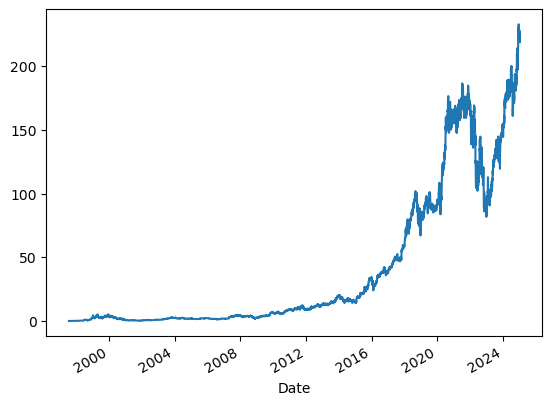

In [89]:
amzn_df['Close'].plot()

<Axes: >

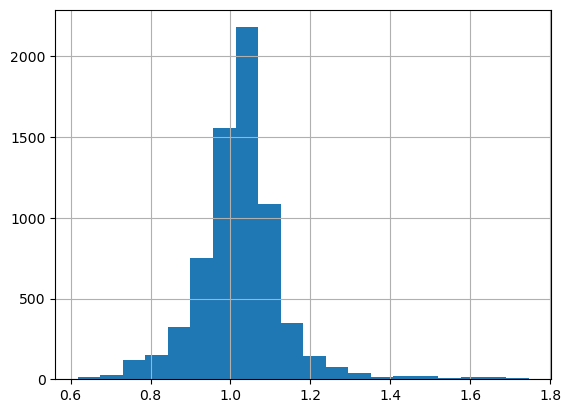

In [90]:
amzn_df['SMA Ratio'].hist(bins=20)

RSI (Relative Strength Index):
- simple momentum indicator, used to identify overbought or oversold conditions
- calculated using formula 100 - (100 / (1 + RSI)) where RSI is the mean gain divided by the mean loss over some time period
- a value above 70 is typically used to indicate that an asset is overbought and a value less tahn 30 is typically used to indicate that an asset is oversold
- calculated here using a 14 day rolling window

In [91]:
amzn_df['Diff'] = amzn_df['Close'].diff()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,Diff
Date,,,,
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776,0.004688
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503,0.007812
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540,-0.001562
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781,-0.002604
1997-08-01 00:00:00-04:00,0.120833,71760000,1.255434,0.001041
...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,3.970001
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,3.419998
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,-5.500000


In [92]:
amzn_df.head(20)

,Close,Volume,SMA Ratio,Diff
Date,,,,
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776,0.004688
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503,0.007812
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540,-0.001562
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781,-0.002604
1997-08-01 00:00:00-04:00,0.120833,71760000,1.255434,0.001041
1997-08-04 00:00:00-04:00,0.115625,53424000,1.250069,-0.005208
1997-08-05 00:00:00-04:00,0.110417,60648000,1.244520,-0.005208
1997-08-06 00:00:00-04:00,0.112500,24864000,1.233541,0.002083
1997-08-07 00:00:00-04:00,0.108854,40680000,1.220793,-0.003646


In [93]:
amzn_df['Mean gain'] = amzn_df['Diff'].rolling(window=14).apply(lambda x: x[x > 0].mean())
amzn_df['Mean loss'] = amzn_df['Diff'].rolling(window=14).apply(lambda x: abs(x[x <= 0].mean()))
amzn_df.dropna(inplace=True)
amzn_df.head(20)

,Close,Volume,SMA Ratio,Diff,Mean gain,Mean loss
Date,,,,,,
1997-08-14 00:00:00-04:00,0.107813,20832000,1.138864,-0.002083,0.003863,0.003353
1997-08-15 00:00:00-04:00,0.105729,31944000,1.117130,-0.002084,0.003698,0.003212
1997-08-18 00:00:00-04:00,0.102083,35688000,1.099265,-0.003646,0.002669,0.003255
1997-08-19 00:00:00-04:00,0.108333,20064000,1.091941,0.006250,0.003385,0.003443
1997-08-20 00:00:00-04:00,0.108333,19992000,1.081505,0.000000,0.003385,0.003154
1997-08-21 00:00:00-04:00,0.105729,12480000,1.072325,-0.002604,0.003971,0.003099
1997-08-22 00:00:00-04:00,0.106250,14256000,1.058688,0.000521,0.003281,0.002865
1997-08-25 00:00:00-04:00,0.110938,22536000,1.046812,0.004688,0.003516,0.002572
1997-08-26 00:00:00-04:00,0.117188,51480000,1.046061,0.006250,0.004210,0.002572


In [94]:
amzn_df['RSI'] = 100 - (100 / (1 + (amzn_df['Mean gain'] / amzn_df['Mean loss'])))
amzn_df.drop(labels=['Diff', 'Mean gain', 'Mean loss'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI
Date,,,,
1997-08-14 00:00:00-04:00,0.107813,20832000,1.138864,53.534446
1997-08-15 00:00:00-04:00,0.105729,31944000,1.117130,53.516533
1997-08-18 00:00:00-04:00,0.102083,35688000,1.099265,45.053251
1997-08-19 00:00:00-04:00,0.108333,20064000,1.091941,49.575140
1997-08-20 00:00:00-04:00,0.108333,19992000,1.081505,51.768678
...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328


<Axes: >

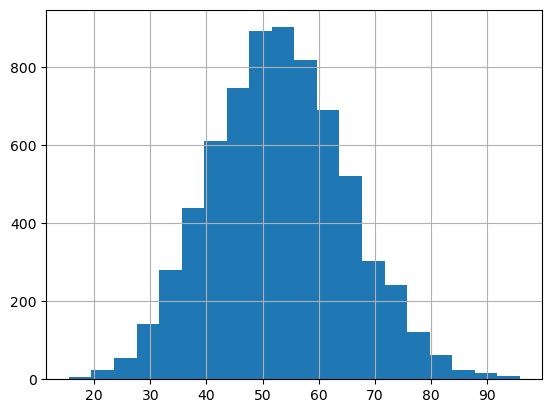

In [95]:
amzn_df['RSI'].hist(bins=20)

Bollinger Bands:
- used to measure price volatility of an asset 
- calculated with two bands, two standard deviations above and below a moving average line
- the distance between the bands indicates volatility of the asset
- also used to indicate overbought or oversold conditions - overbought when the price moves above the upper band and oversold when the price moves below the lower band
- here, just the Bollinger Bandwidth is used as a volatility indicator for simplicity and reducing the number of redundant features- a large bandwidth indicates high volatility and smaller bandwidth indicates lower volatility 
- the bandwidth is calculated as: (upper band - lower band)/ middle band for a given window (20 periods in this case)

In [96]:
amzn_df['Std dev'] = amzn_df['Close'].rolling(window=20).std()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev
Date,,,,,
1997-09-11 00:00:00-04:00,0.157813,85248000,1.167264,72.324230,0.019969
1997-09-12 00:00:00-04:00,0.184375,66672000,1.201997,78.457961,0.023983
1997-09-15 00:00:00-04:00,0.154688,111672000,1.221690,60.000276,0.024289
1997-09-16 00:00:00-04:00,0.167708,128640000,1.249354,61.774824,0.024946
1997-09-17 00:00:00-04:00,0.170313,52152000,1.282008,55.907083,0.025709
...,...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545,3.878148
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099,3.730914
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328,3.804522


In [97]:
amzn_df['SMA 20'] = amzn_df['Close'].rolling(window=20).mean()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev,SMA 20
Date,,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.022098,0.195742
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.020343,0.197227
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.020127,0.197760
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.017387,0.200026
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.015647,0.201589
...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545,3.878148,225.410999
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099,3.730914,225.763999
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328,3.804522,225.517999


In [98]:
amzn_df['Bandwidth'] = ((amzn_df['SMA 20'] + (2 * amzn_df['Std dev'])) - (amzn_df['SMA 20'] - (2 * amzn_df['Std dev']))) / amzn_df['SMA 20']
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev,SMA 20,Bandwidth
Date,,,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.022098,0.195742,0.451564
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.020343,0.197227,0.412582
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.020127,0.197760,0.407098
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.017387,0.200026,0.347698
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.015647,0.201589,0.310476
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545,3.878148,225.410999,0.068819
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099,3.730914,225.763999,0.066103
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328,3.804522,225.517999,0.067481


In [99]:
amzn_df.drop(labels=['Std dev', 'SMA 20'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.451564
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.412582
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.407098
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.347698
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.310476
...,...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545,0.068819
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099,0.066103
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328,0.067481


<Axes: >

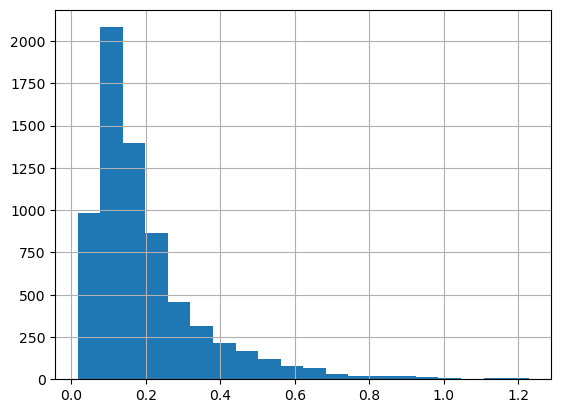

In [100]:
amzn_df['Bandwidth'].hist(bins=20)

In [101]:
amzn_df.describe()

,Close,Volume,SMA Ratio,RSI,Bandwidth
count,6858.000000,6.858000e+03,6858.000000,6858.000000,6858.000000
mean,40.507322,1.370726e+08,1.023169,52.976371,0.198777
std,57.187685,1.373192e+08,0.108543,12.120901,0.153539
min,0.181250,9.744000e+06,0.617761,15.489940,0.016948
25%,2.165125,6.404300e+07,0.972636,44.511076,0.097195
50%,9.206750,1.014090e+08,1.024802,52.648579,0.150193
75%,73.335127,1.558965e+08,1.070208,60.939154,0.241576
max,232.929993,2.086584e+09,1.746507,95.829724,1.227516


In [102]:
# splitting data into training, validation, and test sets
# 0.7 training, 0.1 validation, 0.2 testing

training_data = amzn_df.iloc[:int(amzn_df.shape[0] * 0.7), :].copy(deep=True)
validation_data = amzn_df.iloc[int(amzn_df.shape[0] * 0.7):int(amzn_df.shape[0] * 0.8), :].copy(deep=True)
testing_data = amzn_df.iloc[int(amzn_df.shape[0] * 0.8):, :].copy(deep=True)

In [103]:
training_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.451564
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.412582
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.407098
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.347698
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.310476
...,...,...,...,...,...
2016-10-27 00:00:00-04:00,40.917999,148128000,1.028067,46.143048,0.051013
2016-10-28 00:00:00-04:00,38.816002,216822000,1.021927,38.819899,0.075920
2016-10-31 00:00:00-04:00,39.491001,108266000,1.018205,42.034074,0.084623


In [104]:
validation_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
2016-11-03 00:00:00-04:00,38.351501,77450000,1.001274,37.972623,0.118181
2016-11-04 00:00:00-04:00,37.752499,102442000,0.993392,37.529148,0.131262
2016-11-07 00:00:00-05:00,39.246498,119688000,0.986360,47.898735,0.128769
2016-11-08 00:00:00-05:00,39.387501,68252000,0.980035,48.836398,0.127451
2016-11-09 00:00:00-05:00,38.594002,171258000,0.973602,46.900859,0.127921
...,...,...,...,...,...
2019-07-23 00:00:00-04:00,99.724503,54070000,1.057113,50.365844,0.092045
2019-07-24 00:00:00-04:00,100.040497,52626000,1.054246,50.670351,0.084207
2019-07-25 00:00:00-04:00,98.691002,82730000,1.051322,49.553293,0.077181


In [105]:
testing_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
2019-07-30 00:00:00-04:00,94.926498,58218000,1.034977,36.623140,0.072131
2019-07-31 00:00:00-04:00,93.338997,89414000,1.028293,34.688257,0.085417
2019-08-01 00:00:00-04:00,92.765999,94266000,1.021859,36.422545,0.099475
2019-08-02 00:00:00-04:00,91.162003,99124000,1.014805,36.246828,0.118842
2019-08-05 00:00:00-04:00,88.256500,121164000,1.003716,32.131314,0.149077
...,...,...,...,...,...
2025-01-03 00:00:00-05:00,224.190002,27515600,1.059974,44.360545,0.068819
2025-01-06 00:00:00-05:00,227.610001,31849800,1.057722,43.023099,0.066103
2025-01-07 00:00:00-05:00,222.110001,28084200,1.052848,37.793328,0.067481


In [106]:
min_max_values = {}
for label in ['Close', 'Volume', 'SMA Ratio', 'RSI', 'Bandwidth']:
    min_max_values[label] = [training_data[label].min(), training_data[label].max()]
    training_data[label] = (training_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
min_max_values

{'Close': [0.18125000596046448, 42.21799850463867],
 'Volume': [9744000, 2086584000],
 'SMA Ratio': [0.617760612431569, 1.7465069917435987],
 'RSI': [17.177916817881, 95.82972391076223],
 'Bandwidth': [0.024575112638890517, 1.2275161158358934]}

In [107]:
training_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
1997-10-08 00:00:00-04:00,0.000452,0.022338,0.665141,0.570910,0.354954
1997-10-09 00:00:00-04:00,0.000149,0.033351,0.645005,0.459289,0.322549
1997-10-10 00:00:00-04:00,0.000328,0.031779,0.625469,0.327539,0.317990
1997-10-13 00:00:00-04:00,0.000446,0.003155,0.612184,0.316933,0.268611
1997-10-14 00:00:00-04:00,0.000421,0.010204,0.589496,0.374103,0.237668
...,...,...,...,...,...
2016-10-27 00:00:00-04:00,0.969075,0.066632,0.363506,0.368270,0.021978
2016-10-28 00:00:00-04:00,0.919071,0.099708,0.358066,0.275162,0.042683
2016-10-31 00:00:00-04:00,0.935128,0.047438,0.354769,0.316028,0.049917


In [108]:
training_data.describe()

,Close,Volume,SMA Ratio,RSI,Bandwidth
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.169518,0.074026,0.361479,0.462488,0.169339
std,0.207911,0.074530,0.109432,0.158759,0.140349
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038086,0.035350,0.306956,0.351030,0.072204
50%,0.076463,0.054558,0.361989,0.459065,0.124070
75%,0.247869,0.083788,0.409168,0.569158,0.221862
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
for label in ['Close', 'Volume', 'SMA Ratio', 'RSI', 'Bandwidth']:
    validation_data[label] = (validation_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
validation_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
2016-11-03 00:00:00-04:00,0.908021,0.032600,0.339769,0.264389,0.077814
2016-11-04 00:00:00-04:00,0.893772,0.044634,0.332787,0.258751,0.088688
2016-11-07 00:00:00-05:00,0.929312,0.052938,0.326556,0.390593,0.086616
2016-11-08 00:00:00-05:00,0.932666,0.028172,0.320953,0.402514,0.085521
2016-11-09 00:00:00-05:00,0.913790,0.077769,0.315254,0.377905,0.085911
...,...,...,...,...,...
2019-07-23 00:00:00-04:00,2.368006,0.021343,0.389239,0.421960,0.056087
2019-07-24 00:00:00-04:00,2.375523,0.020648,0.386700,0.425832,0.049572
2019-07-25 00:00:00-04:00,2.343420,0.035143,0.384109,0.411629,0.043731


In [110]:
validation_data.describe()

,Close,Volume,SMA Ratio,RSI,Bandwidth
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,1.632411,0.038963,0.361427,0.455455,0.072101
std,0.486724,0.021766,0.042953,0.143070,0.047109
min,0.850976,0.010573,0.232778,0.096253,-0.006340
25%,1.152474,0.024033,0.332873,0.354079,0.038473
50%,1.738277,0.032553,0.369137,0.440556,0.057135
75%,2.057741,0.047534,0.389454,0.537802,0.095090
max,2.421554,0.154829,0.453396,0.889103,0.227321


In [111]:
for label in ['Close', 'Volume', 'SMA Ratio', 'RSI', 'Bandwidth']:
    testing_data[label] = (testing_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
testing_data

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
2019-07-30 00:00:00-04:00,2.253867,0.023340,0.369628,0.247232,0.039533
2019-07-31 00:00:00-04:00,2.216103,0.038361,0.363707,0.222631,0.050578
2019-08-01 00:00:00-04:00,2.202472,0.040697,0.358006,0.244681,0.062264
2019-08-02 00:00:00-04:00,2.164315,0.043037,0.351757,0.242447,0.078364
2019-08-05 00:00:00-04:00,2.095197,0.053649,0.341933,0.190121,0.103498
...,...,...,...,...,...
2025-01-03 00:00:00-05:00,5.328879,0.008557,0.391774,0.345607,0.036780
2025-01-06 00:00:00-05:00,5.410236,0.010644,0.389779,0.328603,0.034522
2025-01-07 00:00:00-05:00,5.279399,0.008831,0.385461,0.262110,0.035667


In [112]:
testing_data.describe()

,Close,Volume,SMA Ratio,RSI,Bandwidth
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,3.385858,0.027989,0.349948,0.429332,0.095367
std,0.826888,0.016061,0.057477,0.139548,0.064985
min,1.942081,0.002534,0.132033,-0.021461,0.004643
25%,2.664841,0.017542,0.319346,0.335282,0.048514
50%,3.566617,0.024121,0.351654,0.431633,0.079101
75%,4.013408,0.033888,0.388455,0.527427,0.124363
max,5.536792,0.145222,0.492868,0.861310,0.430661


In [113]:
amzn_df = pd.concat([training_data, validation_data, testing_data])
amzn_df

,Close,Volume,SMA Ratio,RSI,Bandwidth
Date,,,,,
1997-10-08 00:00:00-04:00,0.000452,0.022338,0.665141,0.570910,0.354954
1997-10-09 00:00:00-04:00,0.000149,0.033351,0.645005,0.459289,0.322549
1997-10-10 00:00:00-04:00,0.000328,0.031779,0.625469,0.327539,0.317990
1997-10-13 00:00:00-04:00,0.000446,0.003155,0.612184,0.316933,0.268611
1997-10-14 00:00:00-04:00,0.000421,0.010204,0.589496,0.374103,0.237668
...,...,...,...,...,...
2025-01-03 00:00:00-05:00,5.328879,0.008557,0.391774,0.345607,0.036780
2025-01-06 00:00:00-05:00,5.410236,0.010644,0.389779,0.328603,0.034522
2025-01-07 00:00:00-05:00,5.279399,0.008831,0.385461,0.262110,0.035667


In [114]:
amzn_df.describe()

,Close,Volume,SMA Ratio,RSI,Bandwidth
count,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000
mean,0.959305,0.061309,0.359167,0.455151,0.144814
std,1.360421,0.066119,0.096163,0.154108,0.127637
min,0.000000,0.000000,0.000000,-0.021461,-0.006340
25%,0.047194,0.026145,0.314398,0.347521,0.060369
50%,0.214705,0.044137,0.360614,0.450983,0.104425
75%,1.740236,0.070373,0.400841,0.556392,0.180392
max,5.536792,1.000000,1.000000,1.000000,1.000000


In [115]:
amzn_df.to_csv('Amazon Data.csv')

In [50]:
def load_data(stock_ticker, start_date):
    data = yfinance.download(stock_ticker, interval="1d", auto_adjust=True, start=start_date)
    data = data.loc[:,['Close', 'Volume']]
    data.dropna(inplace=True)
    return data

In [44]:
def add_SMA(dataframe):
    df = dataframe.copy(deep=True)
    df['SMA 10'] = df.rolling(window=10)['Close'].mean()
    df['SMA 50'] = df.rolling(window=50)['Close'].mean()
    df.dropna(inplace=True)
    df['SMA Ratio'] = df['SMA 10'] / df['SMA 50']
    df.drop(labels=['SMA 10', 'SMA 50'], axis=1, inplace=True)
    return df

In [45]:
def add_RSI(dataframe):
    df = dataframe.copy(deep=True)
    df['Diff'] = df['Close'].diff()
    df.dropna(inplace=True)
    df['Mean gain'] = df['Diff'].rolling(window=14).apply(lambda x: x[x > 0].mean())
    df['Mean loss'] = df['Diff'].rolling(window=14).apply(lambda x: abs(x[x <= 0].mean()))
    df.dropna(inplace=True)
    df['RSI'] = 100 - (100 / (1 + (df['Mean gain'] / df['Mean loss'])))
    df.drop(labels=['Diff', 'Mean gain', 'Mean loss'], axis=1, inplace=True)
    return df

In [46]:
def add_bandwidth(dataframe):
    df = dataframe.copy(deep=True)
    df['Std dev'] = df['Close'].rolling(window=20).std()
    df.dropna(inplace=True)
    df['SMA 20'] = df['Close'].rolling(window=20).mean()
    df.dropna(inplace=True)
    df['Bandwidth'] = ((df['SMA 20'] + (2 * df['Std dev'])) - (df['SMA 20'] - (2 * df['Std dev']))) / df['SMA 20']
    df.drop(labels=['Std dev', 'SMA 20'], axis=1, inplace=True)
    return df

In [47]:
def split_and_save_data(dataframe, filename):
    df = dataframe.copy(deep=True)
    training_data = df.iloc[:int(df.shape[0] * 0.7), :].copy(deep=True)
    validation_data = df.iloc[int(df.shape[0] * 0.7):int(df.shape[0] * 0.8), :].copy(deep=True)
    testing_data = df.iloc[int(df.shape[0] * 0.8):, :].copy(deep=True)
    min_max_values = {}
    for label in ['Close', 'Volume', 'SMA Ratio', 'RSI', 'Bandwidth']:
        min_max_values[label] = [training_data[label].min(), training_data[label].max()]
        training_data[label] = (training_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
        validation_data[label] = (validation_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
        testing_data[label] = (testing_data[label] - min_max_values[label][0]) / (min_max_values[label][1] - min_max_values[label][0])
    df = pd.concat([training_data, validation_data, testing_data])
    df.to_csv(filename)
    return df

In [48]:
def processing_pipeline(stock_ticker, start_date):
    df = load_data(stock_ticker, start_date)
    df = add_SMA(df)
    df = add_RSI(df)
    df = add_bandwidth(df)
    df = split_and_save_data(df, f"{stock_ticker}_data.csv")
    return df

In [ ]:
def visualize_data(dataframe):
    pass

In [52]:
df = processing_pipeline("KO", "2005-01-01")
df.describe()

[*********************100%***********************]  1 of 1 completed


Price,Close,Volume,SMA Ratio,RSI,Bandwidth
Ticker,KO,KO,,,
count,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000
mean,0.694398,0.106325,0.629564,0.510680,0.154198
std,0.504724,0.062054,0.144930,0.155783,0.122579
min,0.000000,0.000000,-0.427235,0.000000,0.000000
25%,0.221856,0.066997,0.548482,0.398788,0.083648
50%,0.620795,0.091559,0.637289,0.506765,0.126041
75%,1.057270,0.128041,0.726855,0.625809,0.194509
max,1.984413,1.000000,1.000000,1.000000,1.530239
